In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hurtos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/robos.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1)Realizar la comparación de hurtos entre Medellín, Bogotá y Cali para el año 2020 y sacar tres conclusiones. 

In [ ]:
hurtos.set_index("FECHA HECHO", inplace=True) #Se pone como la primera columna la FECHA HECHO
hurtos

,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
FECHA HECHO,,,,,
01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
01/01/2017,5,ANTIOQUIA,5088,BELLO,4
01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...
01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
01/01/2023,85,CASANARE,85001,YOPAL,6
01/01/2023,85,CASANARE,85010,AGUAZUL,1


In [ ]:
hurtos.index
hurtos.index = pd.to_datetime(hurtos.index) # Se convierte el Dataframe en un indice de tipo datetime para poder trabajar rangos de fechas 
hurtos.index
hurtos_2020 = hurtos.query("`FECHA HECHO` >= '2020-01-01' and `FECHA HECHO` <= '2020-12-31'") # Se selecionan las hurtos para el año 2020


<ipython-input-8-cac956f829a0>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hurtos.index = pd.to_datetime(hurtos.index) # Se convierte el Dataframe en un indice de tipo datetime para poder trabajar rangos de fechas


In [ ]:
# Se de termina los municipios que se van a comparar
MUNICIPIO1 = 'MEDELLIN'
MUNICIPIO2 = 'BOGOTA, D.C.'
MUNICIPIO3 = 'CALI'

filtro = hurtos_2020['MUNICIPIO'].isin([MUNICIPIO1, MUNICIPIO2, MUNICIPIO3])# Se realiza el filtro con los valores especificos que se necesitan y usando isin para selecionar los valroes especificos de la columna 
comparacion = hurtos_2020.loc[filtro]



In [ ]:
# se obtiene la tabla de hurtos del año 2020 para los datos selecionados
tabla_hurtos_2020 = comparacion.groupby('MUNICIPIO')['CANTIDAD'].agg(['sum'])
tabla_hurtos_2020

,sum
MUNICIPIO,
"BOGOTA, D.C.",83156
CALI,13531
MEDELLIN,17780


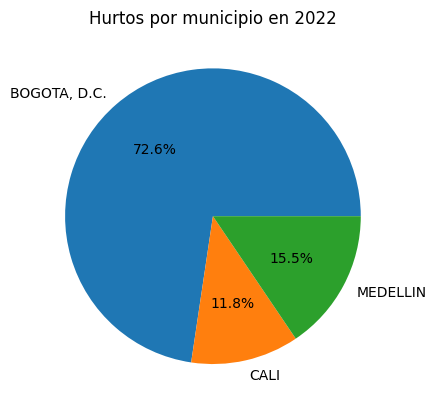

In [ ]:
valores = tabla_hurtos_2020['sum']
etiquetas = tabla_hurtos_2020.index

# Crear el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%') #autopct se usa para mostrar los porcentajes con un decimal 
plt.title('Hurtos por municipio en 2022')

plt.show()

**CONCLUSIONES **

-Bogota tiene la mayor tasa de hurto para el año 20203

-Cali cuenta con 13531 hurtos en el año 2020

-Medellin conto 17780 hurtos en el año 2020

2)En cuál departamento, ignorando Bogotá, se presentó más hurtos para marzo 2019.


In [ ]:
# se crea el nuevo dataframe con los datos de hurtos de marzo del 2019
hurtos_2019 = hurtos.query("`FECHA HECHO` >= '2019-03-01' and `FECHA HECHO` <= '2022-03-31'")

In [ ]:
# Definir el departamento a excluir
excluir = 'BOGOTA, D.C.'

# Filtrar el DataFrame para seleccionar todos los departamentos excepto el que se desea excluir
filtro = f"MUNICIPIO != '{excluir}'"
datos_seleccionados = hurtos_2019.query(filtro)

# Agregar los valores de cantidad por departamento
tabla_departamentos = datos_seleccionados.groupby('DEPARTAMENTO')['CANTIDAD'].agg(['sum'])


print(tabla_departamentos)

                       sum
DEPARTAMENTO              
AMAZONAS               364
ANTIOQUIA           105141
ARAUCA                1297
ATLÁNTICO            43800
BOLÍVAR              19390
BOYACÁ                8685
CALDAS                5828
CAQUETÁ               3357
CASANARE              4769
CAUCA                13451
CESAR                11381
CHOCÓ                 2046
CUNDINAMARCA         46671
CÓRDOBA               6022
GUAINÍA                234
GUAVIARE               245
HUILA                15292
LA GUAJIRA            5489
MAGDALENA            11676
META                 15703
NARIÑO               16690
NORTE DE SANTANDER   12636
PUTUMAYO               921
QUINDÍO               7431
RISARALDA            10841
SAN ANDRÉS ISLAS       889
SANTANDER            32904
SUCRE                 5903
TOLIMA               18134
VALLE DEL CAUCA      72465
VAUPÉS                  70
VICHADA                182


In [ ]:
# se obtiene el valor maximo con el departamento 
fila_maxima = tabla_departamentos.loc[tabla_departamentos['sum'].idxmax()]

# Imprimir la fila y el valor máximo
print(fila_maxima)
print('Valor máximo:', tabla_departamentos['sum'].max())

sum    105141
Name: ANTIOQUIA, dtype: int64
Valor máximo: 105141


3)Investigar cuál fue la población por departamento para el año 2022. Ingresarlo como diccionario y realizar la división a través de Pandas entre cantidad de hurtos por departamento y población. ¿Qué da como resultado esto? Realizar el diagrama que usted considere más conveniente para mostrar los resultados

In [ ]:
#se crea el Dataframe para el año 2022
hurtos_2022 = hurtos.query("`FECHA HECHO` >= '2022-01-01' and `FECHA HECHO` <= '2022-12-31'")

In [ ]:
agrupado2022 = hurtos_2022.groupby(['DEPARTAMENTO'])['CANTIDAD'].sum()# selecionamos las variables de relevancia 
agrupado2022

DEPARTAMENTO
AMAZONAS                 163
ANTIOQUIA              41374
ARAUCA                   450
ATLÁNTICO              21003
BOGOTÁ D.C.           136802
BOLÍVAR                 7887
BOYACÁ                  3590
CALDAS                  1793
CAQUETÁ                 1479
CASANARE                2346
CAUCA                   5536
CESAR                   5197
CHOCÓ                    819
CUNDINAMARCA           22644
CÓRDOBA                 2420
GUAINÍA                   67
GUAVIARE                 113
HUILA                   7668
LA GUAJIRA              2142
MAGDALENA               5868
META                    6878
NARIÑO                  7538
NORTE DE SANTANDER      4653
PUTUMAYO                 429
QUINDÍO                 3261
RISARALDA               5265
SAN ANDRÉS ISLAS         381
SANTANDER              13743
SUCRE                   2304
TOLIMA                  7848
VALLE DEL CAUCA        31997
VAUPÉS                    28
VICHADA                   58
Name: CANTIDAD, dtype: int64

In [ ]:
# se crea el diccionario 
poblacion = {
    'AMAZONAS': 83808,
    'ANTIOQUIA': 6994792,
    'ARAUCA': 308301,
    'ATLÁNTICO': 2835509,
    'BOGOTÁ D.C.': 7968095,
    'BOLÍVAR': 2258929,
    'BOYACÁ': 1267378,
    'CALDAS': 1046418,
    'CAQUETÁ': 423857,
    'CASANARE': 444602,
    'CAUCA': 1528076,
    'CESAR': 1359719,
    'CHOCÓ': 557654,
    'CUNDINAMARCA': 3577177,
    'CÓRDOBA': 1868166,
    'GUAINÍA': 52627,
    'GUAVIARE': 92281,
    'HUILA': 1149598,
    'LA GUAJIRA': 1015909,
    'MAGDALENA': 1476665,
    'META': 1088749,
    'NARIÑO': 1631117,
    'NORTE DE SANTANDER': 1658835,
    'PUTUMAYO': 374042,
    'QUINDÍO': 577543,
    'RISARALDA': 988091,
    'SAN ANDRÉS ISLAS': 65663,
    'SANTANDER': 2340657,
    'SUCRE': 981727,
    'TOLIMA': 1350060,
    'VALLE DEL CAUCA': 4622132,
    'VAUPÉS': 51133,
    'VICHADA': 116944
}

df_poblacion = pd.DataFrame(poblacion.items(), columns=['Departamento', 'Poblacion'])
df_poblacion

,Departamento,Poblacion
0,AMAZONAS,83808
1,ANTIOQUIA,6994792
2,ARAUCA,308301
3,ATLÁNTICO,2835509
4,BOGOTÁ D.C.,7968095
5,BOLÍVAR,2258929
6,BOYACÁ,1267378
7,CALDAS,1046418
8,CAQUETÁ,423857
9,CASANARE,444602


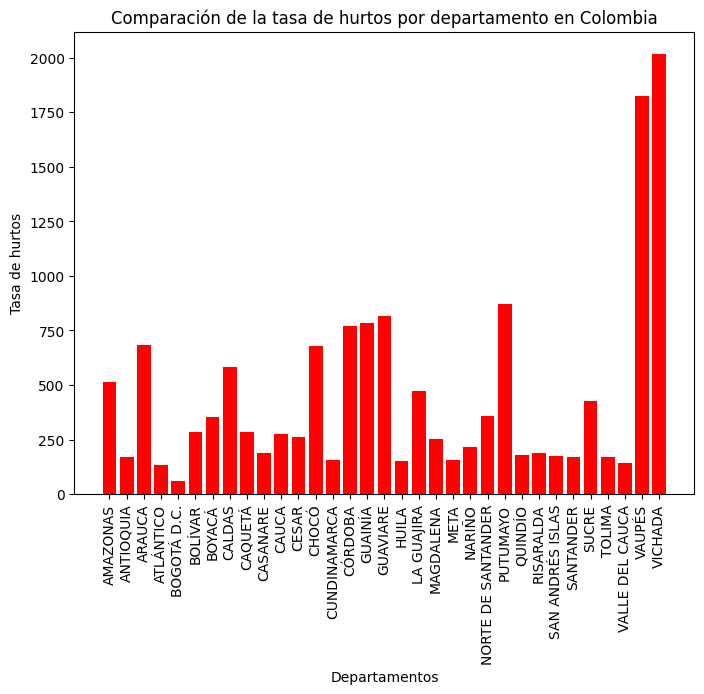

In [ ]:
tasa_hurtos = pd.Series(poblacion).divide(agrupado2022)
Departamentos = ['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOGOTÁ D.C.', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CUNDINAMARCA', 'CÓRDOBA', 'GUAINÍA', 'GUAVIARE', 'HUILA', 'LA GUAJIRA', 'MAGDALENA', 'META', 'NARIÑO', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'SAN ANDRÉS ISLAS', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']
fig = plt.figure(figsize=(8, 6))
plt.bar(Departamentos, tasa_hurtos, color='red')
plt.xticks(rotation=90)
plt.xlabel('Departamentos')
plt.ylabel('Tasa de hurtos')
plt.title('Comparación de la tasa de hurtos por departamento en Colombia')
plt.show()